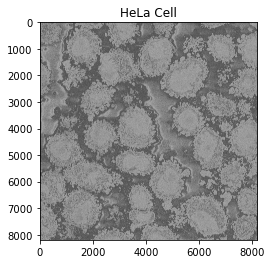

In [1]:
import dm4reader
import numpy as np
import PIL.Image
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

dm4data = dm4reader.DM4File.open("Prefix_3VBSED_roi_00_slice_0000.dm4")

tags = dm4data.read_directory()

image_data_tag = tags.named_subdirs['ImageList'].unnamed_subdirs[1].named_subdirs['ImageData']
image_tag = image_data_tag.named_tags['Data']
   
XDim = dm4data.read_tag_data(image_data_tag.named_subdirs['Dimensions'].unnamed_tags[0])
YDim = dm4data.read_tag_data(image_data_tag.named_subdirs['Dimensions'].unnamed_tags[1])
   
np_array = np.array(dm4data.read_tag_data(image_tag), dtype=np.uint16)
np_array = np.reshape(np_array, (YDim, XDim))
   
output_fullpath = "hela.tif"
image = PIL.Image.fromarray(np_array, 'I;16')
image.save(output_fullpath) 
#k = mpimg.imread("kokeb.tif")
k = cv2.imread('sample.tif')
plt.title('HeLa Cell')
plt.imshow(k)


